In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.animation import FuncAnimation
import astropy as ap
import time

In [86]:
M_E = 5.972*(10**24) # Earth Mass, kg
P_E = 23.9333 # Earth Rotation Period, hours
T_E = 365.2422 # Earth Orbital Period, days
R_E = 6378 # Earth Radius, km
phi = 23.5 * pi/180 # Earth's Axial Tilt in degrees, converted to radians
theta = 35.0 # angle from the level of Moon's orbit on Earth, degrees (must be subtracted from Earth's own axial tilt)
#t is the ellapsed time, ellapsed from set point, in hours/seconds
omega = 0.262 # rad/hr radial velocity of Earth
G = 6.67428*(10**-11)
pi = np.pi

M_m = 7.348*(10**22) # Moon Mass, kg
T_m = 27.2917 # Moon Orbital Period, days
D_a = 405696 # Earth-Center-Moon Apogee, km
D_p = 363300 # Earth-Center-Moon Perigee, km

M_S = 1.989*(10**30) # Sun Mass, kg
L_a = 152097701 # Earth-Sun Aphelion, km
L_p = 147098074 # Earth-Sun Perihelion, km

A_S =  (L_a-L_p)/(2) # Earth-Sun Amplitude, km
A_m =  (D_a-D_p)/(2) # Earth-Moon Amplitude, km

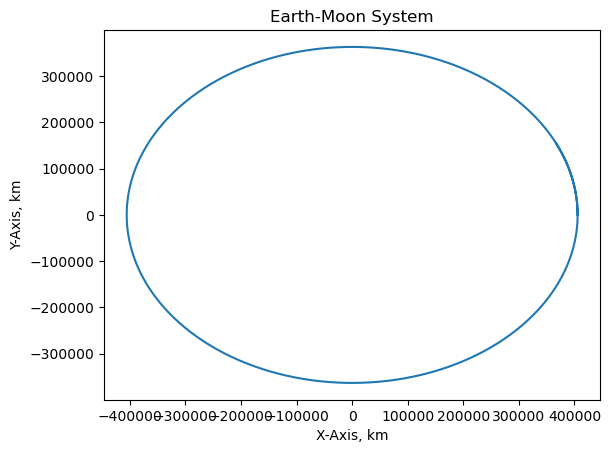

In [92]:
t = np.arange(0,700)
D_EmX = (D_a)*np.cos((2*pi*t)/(P_E*T_m)) # X component of Earth-Moon distance
D_EmY = (D_p)*np.sin((2*pi*t)/(P_E*T_m)) # Y component of Earth-Moon distance
D_Em = ((D_EmX)**2) + ((D_EmY)**2) # Earth-Center-Moon Distance

plt.figure()
plt.plot(D_EmX, D_EmY, label="Moon Orbit")
# plt.plot(C_mX, C_mY, label="Earth Orbit")
plt.xlabel("X-Axis, km")
plt.ylabel("Y-Axis, km")
# plt.legend
plt.title("Earth-Moon System")
plt.show()

In [90]:
# C_m = (M_m*D_Em)/(M_m + M_E) # Earth-Center-Moon Center of Mass, km
# C_mX = (C_m)*np.cos((2*pi*t)/(P_E*T_m))
# C_mY = (C_m)*np.sin((2*pi*t)/(P_E*T_m))

# plt.figure()
# plt.plot(C_mX, C_mY, label="Earth Orbit")
# plt.xlabel("X-Axis, km")
# plt.ylabel("Y-Axis, km")
# plt.title("Earth Orbiting Around center of mass between Moon and Earth")
# plt.show()

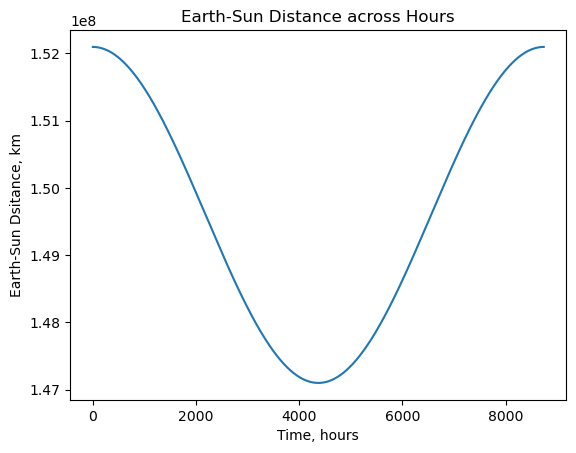

In [91]:
t = np.arange(0,8741)
L_SE = (A_S)*np.cos((2*(pi)*t)/(P_E*T_E)) + (L_a-A_S) #+ C_mX # Earth-Sun Distance. The Sun does exert some tides on the Earth, so it will be helpful here.

plt.figure()
plt.plot(t, L_SE)
plt.xlabel("Time, hours")
plt.ylabel("Earth-Sun Dsitance, km")
plt.title("Earth-Sun Distance across Hours")
plt.show()